In [ ]:
# Extract the dataset
# Run this cell only once at the beginning of the excution
import zipfile
import os

with zipfile.ZipFile('../data/Football-Players.v1i.yolov8.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/')


In [3]:
# Run this cell once to install the required libraries
!pip install ultralytics opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 77.9 MB/s  0:00:006m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.4/810.4 kB 46.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 60.1 MB/s  0:00:006m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 81.9 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.7/915.7 MB 18.1 MB/s  0:00:19m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 79.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 24.9 MB/s  0:00:12m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 49.0 MB/s  0:00:016m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 55.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 23.7 MB/s  0:00:13m0:00

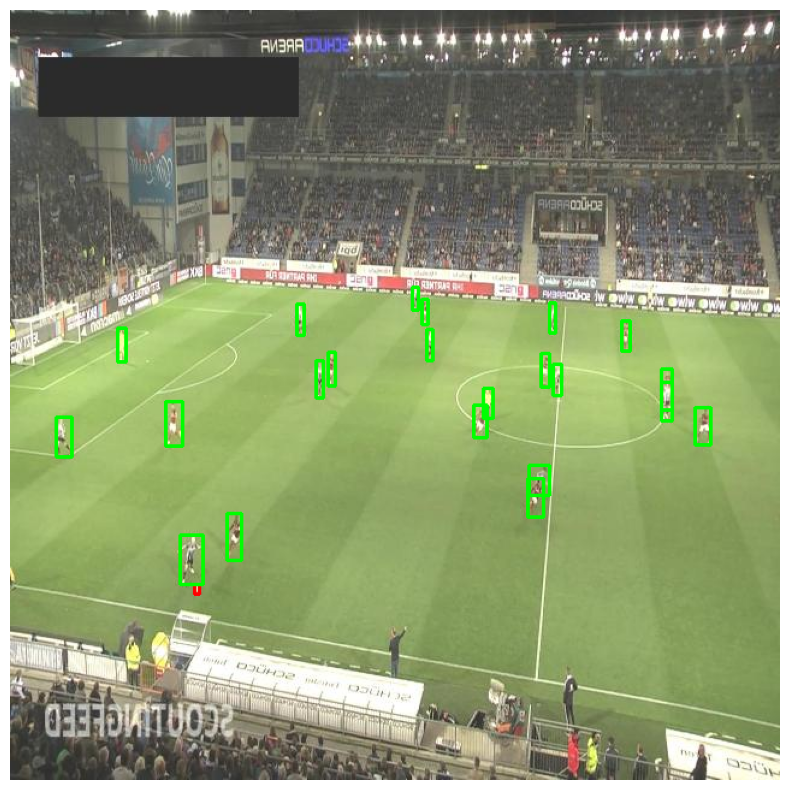

In [3]:
# testing the dataset
import os
import cv2
import matplotlib.pyplot as plt

# Define paths (adjust folder name if needed)
base_dir = '../datasets/train'
img_dir = os.path.join(base_dir, 'images')
lbl_dir = os.path.join(base_dir, 'labels')

# Get the first image and label
img_name = os.listdir(img_dir)[0]
lbl_name = img_name.replace('.jpg', '.txt').replace('.png', '.txt')

# Load image
img_path = os.path.join(img_dir, img_name)
img = cv2.imread(img_path)
h, w, _ = img.shape

# Read labels
with open(os.path.join(lbl_dir, lbl_name), 'r') as f:
    labels = f.readlines()

# Draw boxes
for label in labels:
    class_id, x, y, width, height = map(float, label.split())
    # Convert normalized coordinates to pixel coordinates
    x1 = int((x - width/2) * w)
    y1 = int((y - height/2) * h)
    x2 = int((x + width/2) * w)
    y2 = int((y + height/2) * h)
    
    color = (0, 255, 0) if class_id == 1 else (0, 0, 255) # Green for player, Red for ball
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

# Show inline using matplotlib (VS Code renders this perfectly)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()